In [31]:
import matplotlib.pyplot as plt
import numpy as np


{'RangedRush2(AStarPathFinding)', 'mattRushAi(AStarPathFinding)', 'RangedRush2(BFSPathFinding)', 'newAI(BFSPathFinding)', 'WorkerRush2(BFSPathFinding)', 'newAI(AStarPathFinding)', 'mattRushAi(BFSPathFinding)', 'WorkerRush2(AStarPathFinding)'}
19734
78936


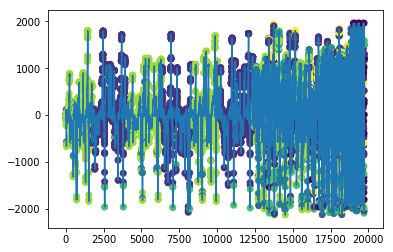

In [7]:
depths = []
decisions = []
scores = []
with open('validate.log') as file:
    for data in file:
        if ' v ' in data:
            depths.append(int(data.split(' ')[-1]))
        elif 'with score of' in data:
            decisions.append(data.split(' ')[1])
            scores.append(float(data.split(': ')[2]))

print(set(decisions))
print(len(scores))
print(len(depths))
colourDict = {}
j = 0
for i in set(decisions):
    colourDict[i] = j
    
    j += 1

colours = []
for i in decisions:
    colours.append(colourDict[i])

plt.plot(scores)
plt.scatter(range(len(scores)),scores,c=colours)



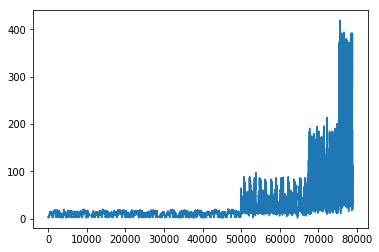

In [8]:
plt.plot(depths)

In [128]:
tournamentCount = -1
tournamentPositions = []
gamePositions = []
tournaments = []
inertiaCycles = []
evalFuncs = []
pathFinders = []
maps = []
lineNumber = 0
winMatrixPositions = []
tieMatrixPositions = []
winnerPositions = []
timeoutMatrixPositions = []
crashMatrixPositions = []

with open('validate-backup.log') as file:
    for lineNumber,data in enumerate(file):
        if 'InertiaCycles: ' in data:
            inertiaCycles.append(int(data.split(' ')[-1]))
        elif 'Eval function' in data:
            evalFuncs.append(str(data.split(' ')[-1]))
        elif 'Pathfinding' in data:
            pathFinders.append(str(data.split(' ')[-1]))          
        elif 'Map =' in data:
            maps.append(str(data.split(' ')[-1]))
            gamePositions.append(lineNumber + 1)
        elif 'Wins' in data:
            winMatrixPositions.append(lineNumber)
        elif 'Ties' in data:
            tieMatrixPositions.append(lineNumber)
        elif 'AI crashes' in data:
            crashMatrixPositions.append(lineNumber)
        elif 'AI timeout' in data:
            timeoutMatrixPositions.append(lineNumber)
        elif 'Starting tournament' in data:
            tournamentPositions.append(lineNumber)
            tournamentCount += 1
        elif  "Winner" in data:
            increment = int(data.split(' ')[1]) + 1
            if increment == 0:
                winnerPositions.append(-1)
            else:
                winnerPositions.append(lineNumber + increment)

winners = []
winMatrices = []
tieMatrices = []
timeoutMatrices = []
crashMatrices = []
            
with open('validate-backup.log') as file:
    lines = file.readlines()
    for i in winnerPositions:
        if i == -1:
            winners.append("Tie")
        else:
            winners.append(lines[i].split(':')[0])
    for j in winMatrixPositions:
        firstRow = [int(lines[j + 1].split('\t')[0]),int(lines[j + 1].split('\t')[1])]
        secondRow = [int(lines[j + 2].split('\t')[0]),int(lines[j + 2].split('\t')[1])]
        matrix = np.array([firstRow,secondRow])
        winMatrices.append(matrix)
    for j in tieMatrixPositions:
        firstRow = [int(lines[j + 1].split('\t')[0]),int(lines[j + 1].split('\t')[1])]
        secondRow = [int(lines[j + 2].split('\t')[0]),int(lines[j + 2].split('\t')[1])]
        matrix = np.array([firstRow,secondRow])
        tieMatrices.append(matrix)
    for j in crashMatrixPositions:
        firstRow = [int(lines[j + 1].split('\t')[0]),int(lines[j + 1].split('\t')[1])]
        secondRow = [int(lines[j + 2].split('\t')[0]),int(lines[j + 2].split('\t')[1])]
        matrix = np.array([firstRow,secondRow])
        crashMatrices.append(matrix)
    for j in timeoutMatrixPositions:
        firstRow = [int(lines[j + 1].split('\t')[0]),int(lines[j + 1].split('\t')[1])]
        secondRow = [int(lines[j + 2].split('\t')[0]),int(lines[j + 2].split('\t')[1])]
        matrix = np.array([firstRow,secondRow])
        timeoutMatrices.append(matrix)
        
            
tournaments =[]
#Need to change this with the new logging method:
for i in range(len(set(inertiaCycles))):
    for j in range(len(set(evalFuncs))):
        for k in range(len(set(pathFinders))):
            tournaments.append([i,j,k])

winRatios = []

for i,mat in enumerate(winMatrices):
    winRatio = mat[0][1] / np.sum(mat)
    winRatios.append(winRatio)
    tournaments[i].append(winRatio)

In [142]:
# Now that we have perprocessed the data into some useful lists:
#print(tournaments)
#Find win rate for each tournament:


#print(winMatrices)
            
bestBotIndex  = np.argmax(winRatios)
#print(winRatios)
#print(tournaments[bestBotIndex])
#print(winMatrices[bestBotIndex])
tournamentArray = np.array(tournaments)
print(tournamentArray)

[[0.         0.         0.         0.4       ]
 [0.         0.         1.         0.46153846]
 [0.         1.         0.         0.46666667]
 [0.         1.         1.         0.30769231]
 [0.         2.         0.         0.4375    ]
 [0.         2.         1.         0.6       ]
 [1.         0.         0.         0.46153846]
 [1.         0.         1.         0.46153846]
 [1.         1.         0.         0.46153846]
 [1.         1.         1.         0.5       ]
 [1.         2.         0.         0.38461538]
 [1.         2.         1.         0.30769231]
 [2.         0.         0.         0.53333333]
 [2.         0.         1.         0.46153846]
 [2.         1.         0.         0.5       ]
 [2.         1.         1.         0.57142857]
 [2.         2.         0.         0.41666667]
 [2.         2.         1.         0.5625    ]
 [3.         0.         0.         0.38461538]
 [3.         0.         1.         0.42857143]
 [3.         1.         0.         0.375     ]
 [3.         

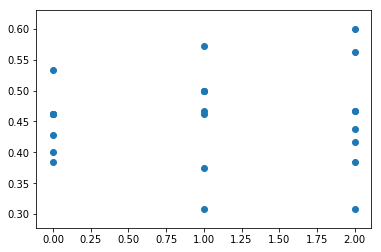

In [146]:
plt.scatter(tournamentArray[:,1],tournamentArray[:,-1])

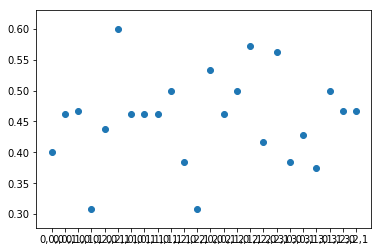

In [89]:
#N.B start time of the latest tournament run was 18:05 on Sunday. 